In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("./Iris-cleaned.csv")
df = pd.get_dummies(df)
print(df.shape)
df.head(3)

(150, 7)


,sepal length,sepal width,petal length,petal width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0


In [3]:
df = (df - df.mean()) / df.std()

# PVE

PC1    6.209232e-01
PC2    2.515610e-01
PC3    9.746113e-02
PC4    2.330814e-02
PC5    4.399954e-03
PC6    2.346563e-03
PC7    4.170421e-33
dtype: float64


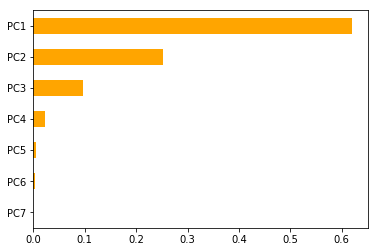

In [6]:
n_comp = df.shape[1]
cols = ['PC'+str(i+1) for i in range(n_comp)]
pca = PCA(n_components=n_comp)
pca.fit(df)
PVE = pd.Series(pca.explained_variance_ratio_, index=cols)
print(PVE)
PVE.sort_values().plot.barh(color='orange')

In [7]:
PVE.sum()

1.0

In [10]:
df_loadings = pd.DataFrame(pca.components_,columns= df.columns, index=cols)
print(df_loadings.shape)
df_loadings.round(2)

(7, 7)


,sepal length,sepal width,petal length,petal width,species_setosa,species_versicolor,species_virginica
PC1,0.41,-0.23,0.48,0.47,-0.45,0.10,0.35
PC2,-0.16,-0.45,-0.02,-0.09,-0.23,0.70,-0.47
PC3,-0.44,-0.75,-0.07,-0.04,0.04,-0.36,0.32
PC4,0.74,-0.39,-0.01,-0.41,0.29,-0.14,-0.15
PC5,-0.05,0.15,0.09,-0.75,-0.49,0.10,0.39
PC6,0.25,-0.03,-0.87,0.19,-0.30,0.08,0.21
PC7,-0.00,-0.00,0.00,0.00,-0.58,-0.58,-0.58


In [14]:
df_scores = pd.DataFrame(pca.transform(df),columns=cols)
print(df_scores.shape)
df_scores.round(2)

(150, 7)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-2.80,-0.67,-0.15,0.10,0.04,0.04,-0.0
1,-2.64,-0.11,0.82,0.38,-0.12,0.01,0.0
2,-2.87,-0.28,0.58,0.02,-0.05,-0.01,0.0
3,-2.81,-0.16,0.80,0.02,-0.07,-0.14,0.0
4,-2.91,-0.75,-0.27,-0.08,0.08,-0.00,-0.0
5,-2.67,-1.17,-1.03,-0.11,-0.01,0.00,0.0
6,-2.94,-0.48,0.28,-0.31,-0.06,-0.08,0.0
7,-2.77,-0.54,0.07,0.10,0.02,-0.04,-0.0
8,-2.83,0.09,1.26,0.02,-0.13,-0.13,0.0
9,-2.72,-0.20,0.65,0.34,0.02,-0.07,-0.0


# Bi Plot

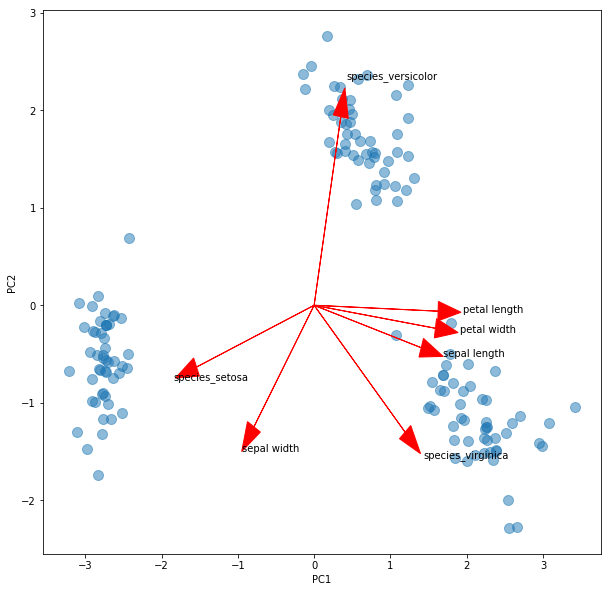

In [19]:
df_scores.plot.scatter(x='PC1',y='PC2',alpha=0.5,s=100,figsize=(10,10))
x_scale = df_scores['PC1'].abs().max()
y_scale = df_scores['PC2'].abs().max()
for k in range(df.shape[1]):
    x = x_scale*df_loadings.iloc[0,k]
    y = y_scale*df_loadings.iloc[1,k]
    plt.arrow(0,0,x,y,head_width=0.2,color='red')
    x=1.2*x
    y=1.2*y
    plt.text(x,y,df.columns[k],color='black')